# k-means

In [28]:
import jax
import jax.numpy as jnp
import jax.random as random
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

from basic.clustering import KMeans

## Unit Tests

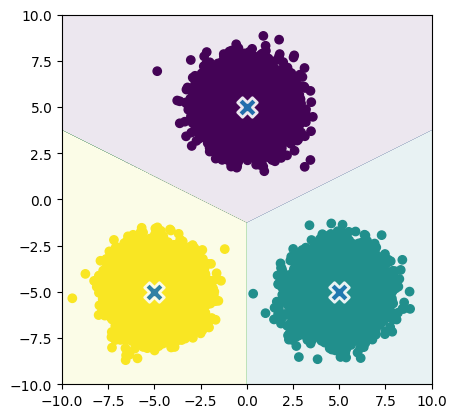

In [29]:
# training data
np.random.seed(0)

# randomly generate clusters
samples = 10000
x1 = np.random.normal(size=(samples, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(samples, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(samples, 2))
x3 += np.array([0, 5])
x_train = np.vstack((x1, x2, x3))

x0, x1 = np.meshgrid(np.linspace(-10, 10, samples), np.linspace(-10, 10, samples))
x = np.array([x0, x1]).reshape(2, -1).T

# seed
key1, key2 = random.split(random.PRNGKey(0), 2)

# k-means
k = 3
kmeans = KMeans()
centers, cluster = kmeans.fit(key1, k, x_train, max_iter=100)

plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, edgecolor="white")
plt.contourf(x0, x1, kmeans.predict(x, centers, cluster).reshape(samples, samples), alpha=0.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



## On Iris Dataset

/home/yyf/miniconda3/envs/jax-0.4.8/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


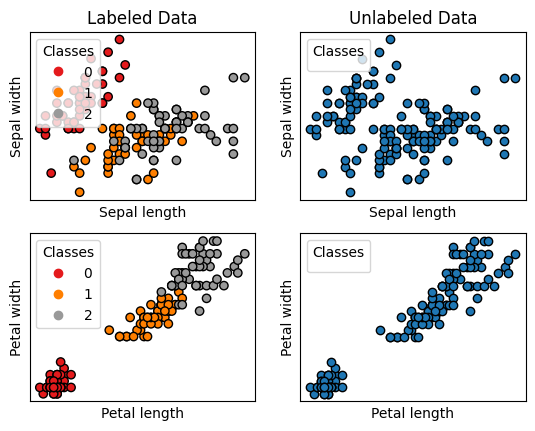

In [30]:
from sklearn import datasets 


# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Plot the training points
ax = plt.subplot(2,2,1)
sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
ax.legend(*sc.legend_elements(), loc="upper left", title="Classes")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())
plt.title('Labeled Data')

ax = plt.subplot(2,2,2)
sc = ax.scatter(X[:, 0], X[:, 1], edgecolor="k")
ax.legend(*sc.legend_elements(), loc="upper left", title="Classes")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())
plt.title('Unlabeled Data')

ax = plt.subplot(2,2,3)
sc = ax.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor="k")
ax.legend(*sc.legend_elements(), loc="upper left", title="Classes")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xticks(())
plt.yticks(())

ax = plt.subplot(2,2,4)
sc = ax.scatter(X[:, 2], X[:, 3], edgecolor="k")
ax.legend(*sc.legend_elements(), loc="upper left", title="Classes")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xticks(())
plt.yticks(())
plt.show()

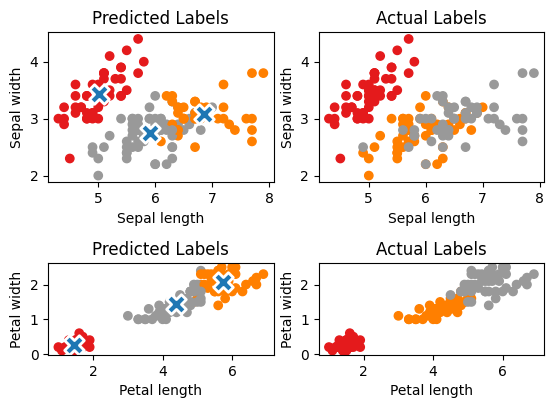

In [31]:
N_SAMPLES = X.shape[0]

# split data randomly: PASS
x_train = X

# apply k-means
k = 3
model = KMeans()

# seed
key1, key2 = random.split(random.PRNGKey(1000), 2)

# apply k-means
centers, cluster = model.fit(key1, k, x_train, max_iter=100)

plt.subplot(2,2,1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster, cmap=plt.cm.Set1)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, edgecolor="white")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted Labels')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,2,2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Actual Labels')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,2,3)
plt.scatter(x_train[:, 2], x_train[:, 3], c=cluster, cmap=plt.cm.Set1)
plt.scatter(centers[:, 2], centers[:, 3], s=200, marker='X', lw=2, edgecolor="white")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Predicted Labels')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(2,2,4)
plt.scatter(x_train[:, 2], x_train[:, 3], c=y, cmap=plt.cm.Set1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Actual Labels')
plt.gca().set_aspect('equal', adjustable='box')


## Image Segmentation

This section is to use k-means to do image segmentation. 
The principle is to cluster the pixels in the image according to their color values.
The number of clusters is the number of colors we want to distinguish in the image.

In [32]:
from matplotlib.image import imread 

# images
img = imread('./sunflower.jpg')
h, w = img.shape[:2]
X = img.reshape(-1,3)

# apply k-means
# cluster the pixels by color 
# k=2 means we want to segement the image into 2 parts with 2 different colors
k = 2
model = KMeans()

# seed
key1, key2 = random.split(random.PRNGKey(1000), 2)

# apply k-means
centers, cluster = model.fit(key1, k, X, max_iter=100)


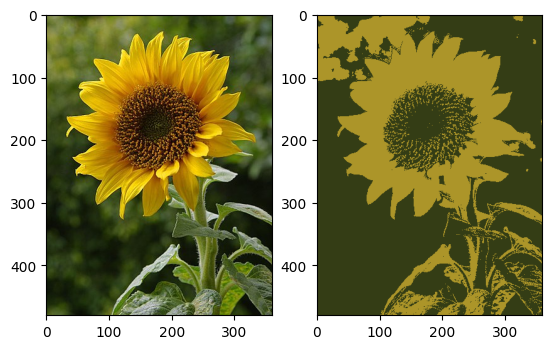

In [33]:
# reconstruct the segmented image from centroids and labels
pixels = centers[cluster]
img_segmented = pixels.reshape(h,w,3)
# convert to uint8
img_segmented = np.clip(img_segmented, 0, 255).astype('uint8')

# plot 
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img_segmented)